In [11]:
import pandas as pd

df = pd.read_csv("jitensha.csv")
df.head()

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,被害者の年齢,被害者の職業,施錠関係
0,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240117,23,その他の住宅（３階建て以下共同住宅等）,駐車（輪）場,20歳代,大学生,施錠した
1,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240227,18,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
2,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240528,20,駐車（輪）場,駐車（輪）場,40歳代,その他,施錠した
3,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240627,21,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
4,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240917,14,その他,その他,20歳代,その他,施錠せず


In [2]:
# 市区町村ごとの件数
df.groupby('市区町村（発生地）').size().sort_values(ascending=False)

市区町村（発生地）
船橋市        1263
市川市         872
柏市          691
松戸市         678
千葉市中央区      656
八千代市        458
習志野市        450
浦安市         435
野田市         367
千葉市稲毛区      334
千葉市美浜区      328
千葉市若葉区      313
流山市         302
千葉市花見川区     290
市原市         285
千葉市緑区       213
成田市         211
四街道市        165
木更津市        157
佐倉市         146
鎌ケ谷市        140
印西市         125
八街市         115
我孫子市        114
東金市         103
茂原市          94
君津市          84
旭市           64
白井市          63
館山市          52
富津市          45
袖ケ浦市         42
富里市          31
銚子市          30
酒々井町         30
大網白里市        26
山武市          24
香取市          22
一宮町          21
鴨川市          16
いすみ市         15
栄町           14
横芝光町         11
匝瑳市           9
長生村           9
南房総市          8
鋸南町           5
多古町           4
九十九里町         3
東庄町           3
神崎町           2
勝浦市           1
御宿町           1
睦沢町           1
白子町           1
dtype: int64

In [3]:
# 発生場所
df.groupby('発生場所').size().sort_values(ascending=False)

発生場所
その他                    3077
駐車（輪）場                 2954
その他の住宅（３階建て以下共同住宅等）    1491
４階建て以上共同住宅             1084
一戸建住宅                   805
道路上                     532
dtype: int64

In [4]:
# 時間帯
df.groupby('発生時（始期）').size().sort_values(ascending=False)

発生時（始期）
7     919
18    875
17    859
16    695
8     675
19    606
12    508
20    500
15    473
10    433
21    413
9     411
13    390
14    388
11    371
6     333
22    311
23    229
0     167
不明    115
5     113
1      74
2      32
4      30
3      23
dtype: int64

In [5]:
# 鍵の有無
df.groupby('施錠関係').size()

施錠関係
施錠した    3162
施錠せず    6781
dtype: int64

In [6]:
# 月ごとの件数
df['発生日'] = pd.to_datetime(df['発生年月日（始期）'], format="%Y%m%d", errors='coerce')
df['月'] = df['発生日'].dt.month.astype('Int64')
df.groupby('月').size()

月
1      620
2      569
3      681
4      761
5      813
6      826
7     1027
8      943
9      984
10     956
11     888
12     782
dtype: int64

In [7]:
# 被害者の年齢
df.groupby('被害者の年齢').size().sort_values(ascending=False)

被害者の年齢
10歳代           4342
20歳代           2693
30歳代            986
40歳代            751
50歳代            537
70歳以上           286
60-64歳          166
65-69歳           88
10歳未満            64
法人・団体、被害者なし      30
dtype: int64

In [8]:
# 被害者の職業
df.groupby('被害者の職業').size().sort_values(ascending=False)

被害者の職業
その他            4968
高校生            2208
大学生            1612
中学生             886
小学生             239
法人・団体、被害者なし      30
dtype: int64

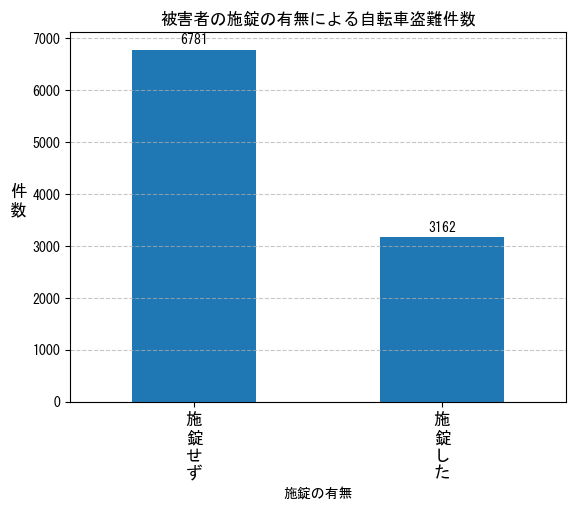

In [9]:
# bar graph of 施錠関係
import matplotlib.pyplot as plt

# fix japanese font issue for windows
plt.rcParams['font.family'] = 'MS Gothic'

occupation_counts = df['施錠関係'].value_counts()
ax = occupation_counts.plot(kind='bar')
plt.xlabel('施錠の有無')
plt.ylabel('件数')
plt.title('被害者の施錠の有無による自転車盗難件数')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.ylabel('件\n数', rotation=0, ha='right', fontsize=12)
labels = [txt.get_text() for txt in ax.get_xticklabels()]
vertical_labels = ["\n".join(list(label)) for label in labels]
ax.set_xticklabels(vertical_labels, rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

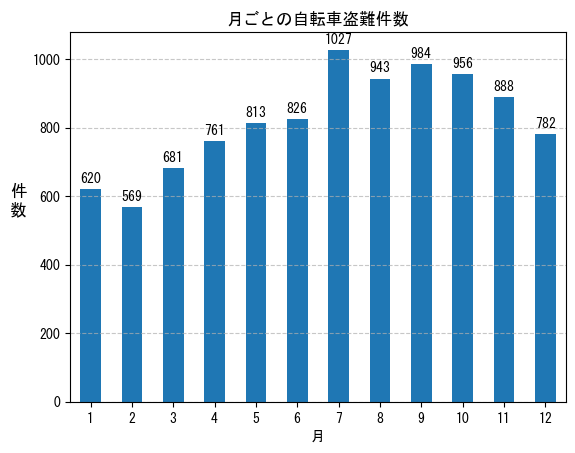

In [10]:
# bar graph of 月ごとの件数
import matplotlib.pyplot as plt

# fix japanese font issue for windows
plt.rcParams['font.family'] = 'MS Gothic'

monthly_counts = df.groupby('月').size().sort_index(ascending=True)
ax =monthly_counts.plot(kind='bar', rot=0)
plt.xlabel('月')
plt.ylabel('件数')
plt.title('月ごとの自転車盗難件数')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.ylabel('件\n数', rotation=0, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # グリッド線を追加
plt.show()

自転車の盗難状況を調べるために、「施錠の有無」と「発生月」に注目しました。<br>まず、施錠の有無に関しては、施錠している場合の盗難件数が3,128件なのに対し、施錠していない場合が6,722件と2倍以上の値になっていることから、施錠していない自転車が盗難されやすいことが分かります。その理由として、窃盗犯側も、圧倒的に窃盗しやすい施錠していない自転車を狙うからだと考えられます。<br>次に、月ごとの盗難件数に関しては、グラフより、7月あたりから盗難件数が1000件を超えるなど急激に増加していることが見て取れます。これは、7月に多くの人が夏休みなどの長期休暇に入ることによる、**外出機会の増加**や**自転車の放置時間増**が原因だと考えられます。また、気温が上がることにより活動の幅増えることも原因の一つだと考えます。<br>以上の事から、盗難防止に努めるためには、施錠をしっかりとして、7月からの放置時間増加や、活動幅が広がる期間は特に注意を払うことが必要だと考えました。